<a href="https://colab.research.google.com/github/jimmy-pink/computer-science-manual/blob/main/Algorithm-DataStructure/%E9%A9%AC%E6%8B%89%E8%BD%A6%E7%AE%97%E6%B3%95-Manacher's_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 马拉车算法 Manacher's Algorithm
用于查找 **最大回文子串**  

数组区间[a,b]是回文子串， 那么[a+n, b-n]区间也一定是回文子串。   
根据这个特征，再访问最大回文子串中心点右边的元素时，它的最小回文半径可以参考它镜像元素。  
比如图中，遍历到6，7，8时，这们的最小回文半径可以参考2，3，4.

**核心思想**

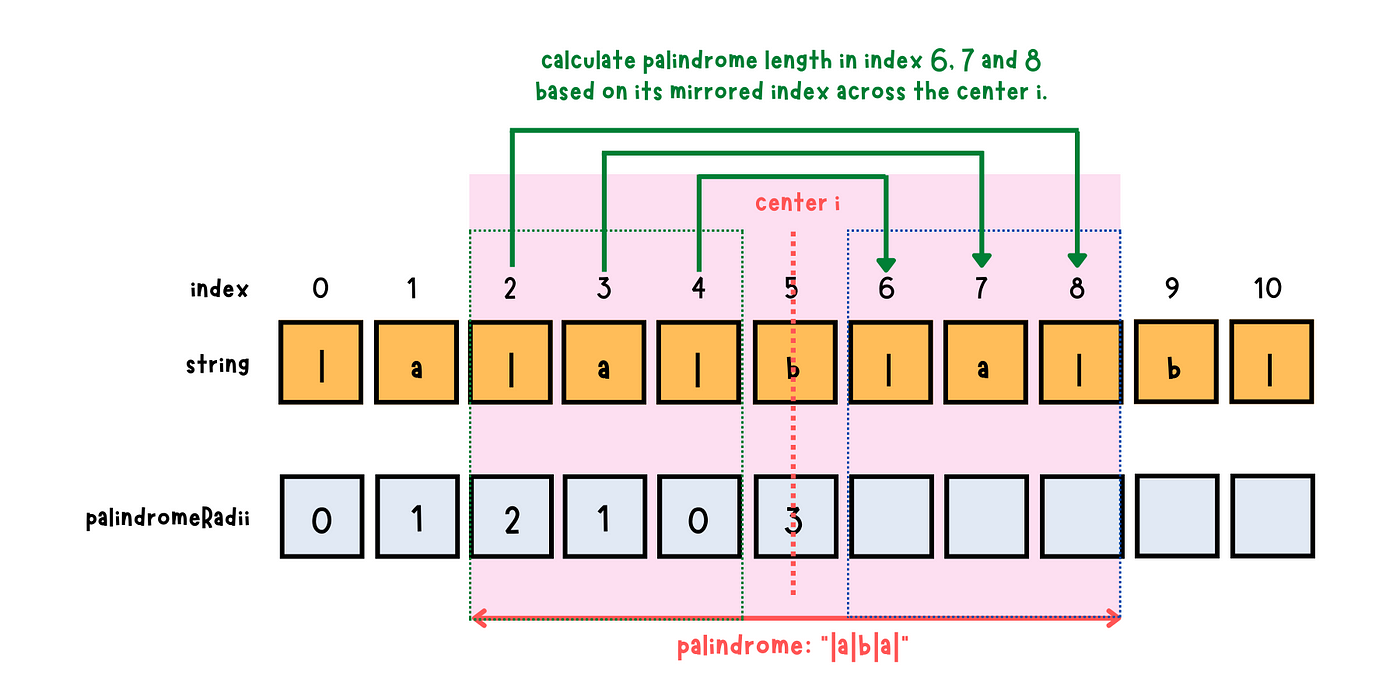

**统一改为奇回文串**  



```text
s=xabay => processed = _x_a_b_a_y_ => p回文串[ps:pe]=_a_b_a_ => s回文串[ss:se]=s[(ps/2):(len(s)-pe//2)]
s=xaay => proccessed=_x_a_a_y_ => p回文串[ps:pe]_a_a_ => s回文串[ss:se]=s[(ps/2):(len(s)-pe//2)]  
```
不管偶回文串，还是奇回文串，统一处理后，procceded 和 s 各自去掉最大回文串，procceded的前半段和后半段长度 分别是s的2倍。


### Leetcode 05

In [1]:
class Solution:
    def longestPalindrome(self, s: str) -> str:
        processed = "_" + "_".join(s) + "_"
        his_radius = [0]*len(processed)
        center = 0 # 最右 最长回文中心 ，当前只关注回文半径覆盖最右的轴
        right = 0 # 最右 最长回文的 右端点
        for i in range(len(processed)):
            l=r=i
            if i<right:
                mirror_index = center - (right - center)
                mirror_radius = his_radius[mirror_index]
                his_radius[i] = min(mirror_radius, right-i) # 取镜像回文 和 i到右边界长度 的两者最小值
                l = i - his_radius[i]
                r = i + his_radius[i]
            while l>=0 and r <len(processed) and processed[l] == processed[r] :
                l-=1
                r+=1
                his_radius[i] += 1
            if r > right:
                center = i
                right = r-1
        max_radius = max(his_radius) #全局最大回文半径
        max_index = his_radius.index(max_radius) #最大回文中心
        ps = max_index - max_radius + 1 # processed串的 最大回文 开始下标
        pe = max_index + max_radius
        ss = ps//2
        se = len(s) - (len(processed) - pe) // 2
        return s[ss:se]


print(Solution().longestPalindrome("ccc"))
print(Solution().longestPalindrome("iaiaibiaibi"))

ccc
iaibiai
